# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [3]:
import certifi
print(certifi.where())

C:\ProgramData\anaconda3\Lib\site-packages\certifi\cacert.pem


In [4]:
!pip install --upgrade certifi

In [8]:
df = pd.read_csv("processed.cleveland.data.csv", 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [9]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [10]:
file_path = "processed.cleveland.data.csv"  # ajuste se o caminho for diferente
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

df = pd.read_csv(file_path, names=column_names)

df['disease'] = df['num'].apply(lambda x: 0 if x == 0 else 1)

bivariada = df.groupby('sex')['disease'].agg(
    saudaveis=lambda x: (x == 0).sum(),
    doentes=lambda x: (x == 1).sum(),
    total='count',
    media_doentes='mean'
).reset_index()

bivariada['odds'] = bivariada['doentes'] / bivariada['saudaveis']

total_doentes = df['disease'].sum()
total_saudaveis = (df['disease'] == 0).sum()
odds_total = total_doentes / total_saudaveis

bivariada['odds_ratio'] = bivariada['odds'] / odds_total
bivariada['logito'] = np.log(bivariada['odds'])
bivariada['woe'] = np.log(bivariada['odds_ratio'])

bivariada['sex'] = bivariada['sex'].map({0.0: 'Mulher', 1.0: 'Homem'})

print(bivariada)

      sex  saudaveis  doentes  total  media_doentes      odds  odds_ratio  \
0  Mulher         72       25     97       0.257732  0.347222    0.409672   
1   Homem         92      114    206       0.553398  1.239130    1.461996   

    logito       woe  
0 -1.05779 -0.892398  
1  0.21441  0.379802  


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [12]:
df = pd.read_csv('processed.cleveland.data.csv')
print(df.head())
print(df.shape)        
print(df.columns)    

   63.0  1.0  1.0.1  145.0  233.0  1.0.2  2.0  150.0  0.0  2.3  3.0 0.0.1  \
0  67.0  1.0    4.0  160.0  286.0    0.0  2.0  108.0  1.0  1.5  2.0   3.0   
1  67.0  1.0    4.0  120.0  229.0    0.0  2.0  129.0  1.0  2.6  2.0   2.0   
2  37.0  1.0    3.0  130.0  250.0    0.0  0.0  187.0  0.0  3.5  3.0   0.0   
3  41.0  0.0    2.0  130.0  204.0    0.0  2.0  172.0  0.0  1.4  1.0   0.0   
4  56.0  1.0    2.0  120.0  236.0    0.0  0.0  178.0  0.0  0.8  1.0   0.0   

   6.0  0  
0  3.0  2  
1  7.0  1  
2  3.0  0  
3  3.0  0  
4  3.0  0  
(302, 14)
Index(['63.0', '1.0', '1.0.1', '145.0', '233.0', '1.0.2', '2.0', '150.0',
       '0.0', '2.3', '3.0', '0.0.1', '6.0', '0'],
      dtype='object')


In [13]:
colunas = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
           'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'disease']

df = pd.read_csv('processed.cleveland.data.csv', header=None, names=colunas)

print(df.head())
print(df.shape)

    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  disease  
0    3.0  0.0  6.0        0  
1    2.0  3.0  3.0        2  
2    2.0  2.0  7.0        1  
3    3.0  0.0  3.0        0  
4    1.0  0.0  3.0        0  
(303, 14)


In [14]:
df['disease'] = df['disease'].apply(lambda x: 1 if int(x) > 0 else 0)

total_saudaveis = (df['disease'] == 0).sum()
total_doentes = (df['disease'] == 1).sum()

odds_total = total_doentes / total_saudaveis

df['age_group'] = pd.qcut(df['age'], q=5)

bivariada_age = df.groupby('age_group').agg(
    saudaveis=('disease', lambda x: (x == 0).sum()),
    doentes=('disease', lambda x: (x == 1).sum()),
    total=('disease', 'count'),
    media_doentes=('disease', 'mean'),
    media_idade=('age', 'mean')
).reset_index()

bivariada_age['odds'] = bivariada_age['doentes'] / bivariada_age['saudaveis']
bivariada_age['odds_ratio'] = bivariada_age['odds'] / odds_total
bivariada_age['logito'] = np.log(bivariada_age['odds'])
bivariada_age['woe'] = np.log(bivariada_age['odds_ratio'])

print(bivariada_age)

        age_group  saudaveis  doentes  total  media_doentes  media_idade  \
0  (28.999, 45.0]         47       16     63       0.253968    41.222222   
1    (45.0, 53.0]         42       22     64       0.343750    50.000000   
2    (53.0, 58.0]         32       39     71       0.549296    56.211268   
3    (58.0, 62.0]         13       32     45       0.711111    60.355556   
4    (62.0, 77.0]         30       30     60       0.500000    66.516667   

       odds  odds_ratio    logito       woe  
0  0.340426    0.401653 -1.077559 -0.912166  
1  0.523810    0.618020 -0.646627 -0.481235  
2  1.218750    1.437950  0.197826  0.363218  
3  2.461538    2.904261  0.900787  1.066179  
4  1.000000    1.179856  0.000000  0.165392  


C:\Users\Usuario\AppData\Local\Temp\ipykernel_7324\2966312042.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bivariada_age = df.groupby('age_group').agg(


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

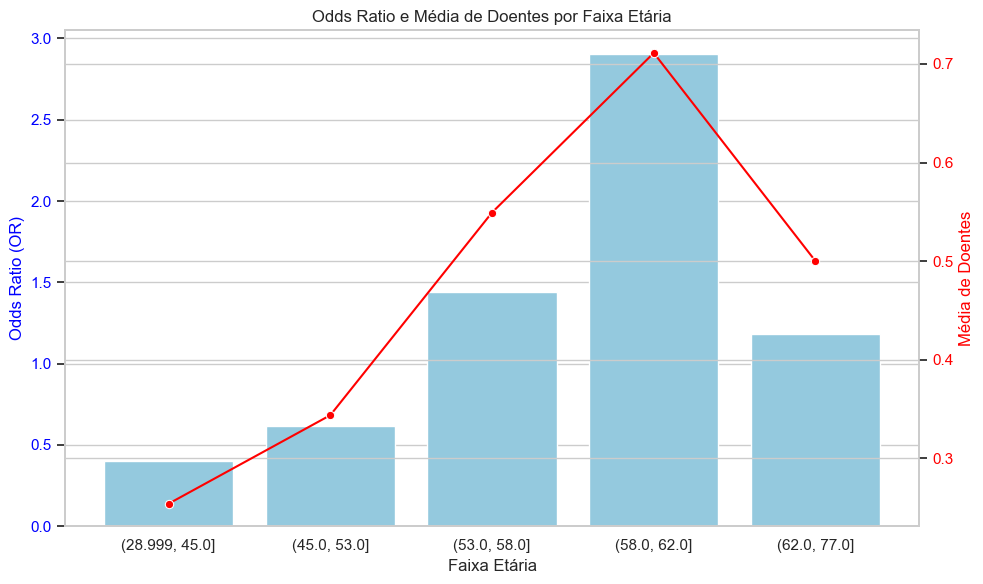

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

fig, ax1 = plt.subplots(figsize=(10,6))

bivariada_age['age_group_str'] = bivariada_age['age_group'].astype(str)

sns.barplot(x='age_group_str', y='odds_ratio', data=bivariada_age, ax=ax1, color='skyblue')
ax1.set_ylabel('Odds Ratio (OR)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xlabel('Faixa Etária')
ax1.set_title('Odds Ratio e Média de Doentes por Faixa Etária')

ax2 = ax1.twinx()

sns.lineplot(x='age_group_str', y='media_doentes', data=bivariada_age, ax=ax2, color='red', marker='o')
ax2.set_ylabel('Média de Doentes', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()